## 원핫 인코딩과 라벨 인코딩의 recall값 비교

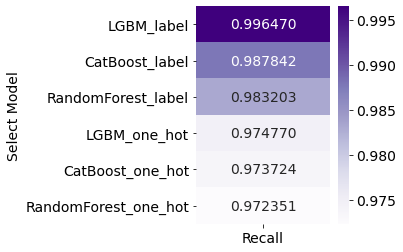

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Select Model': ['CatBoost_one_hot', 'LGBM_one_hot', 'RandomForest_one_hot',
                         'CatBoost_label', 'LGBM_label', 'RandomForest_label'],
        'Recall': [0.9737238, 0.9747696, 0.9723511, 0.9878423, 0.9964704, 0.9832026]}

df = pd.DataFrame(data)
df = df.sort_values(by = "Recall", ascending = False)
df.set_index('Select Model', inplace=True)
plt.figure(figsize = (3, 4))
sns.heatmap(data = df, annot=True,fmt=".6f", cmap='Purples', xticklabels=df.columns, yticklabels=df.index)
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Select Model': ['CatBoost_one_hot', 'LGBM_one_hot', 'RandomForest_one_hot',
                         'CatBoost_label', 'LGBM_label', 'RandomForest_label'],
        'Recall': [0.9737238, 0.9747696, 0.9723511, 0.9878423, 0.9964704, 0.9832026]}

df = pd.DataFrame(data)
df.set_index('Select Model', inplace=True)

# 'Recall' 열을 기준으로 내림차순 정렬하여 'Rank' 열 추가
df['Rank'] = df['Recall'].rank(method='dense', ascendiㅁng=False)

df.sort_values(by = "Rank")

,Recall,Rank
Select Model,,
LGBM_label,0.996470,1.0
CatBoost_label,0.987842,2.0
RandomForest_label,0.983203,3.0
LGBM_one_hot,0.974770,4.0
CatBoost_one_hot,0.973724,5.0
RandomForest_one_hot,0.972351,6.0


## 라벨인코딩 결과 확인

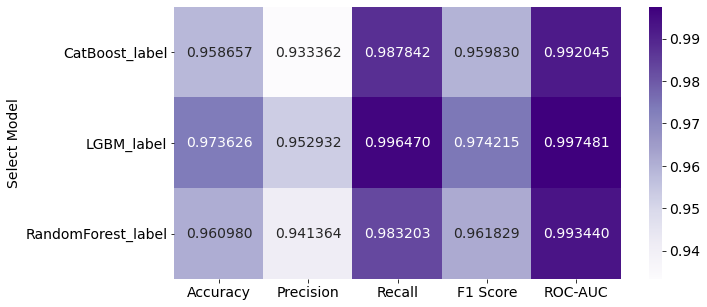

In [47]:
import pandas as pd

data = {
    'Select Model': ['CatBoost_label', 'LGBM_label', 'RandomForest_label'],
    'Accuracy': [0.9586574, 0.9736257, 0.9609804],
    'Precision': [0.9333622, 0.9529316, 0.9413642],
    'Recall': [0.9878423, 0.9964704, 0.9832026],
    'F1 Score': [0.9598298, 0.9742148, 0.9618286],
    'ROC-AUC': [0.9920447, 0.9974812, 0.99344]
}

# DataFrame 생성
df = pd.DataFrame(data)
df

df = pd.DataFrame(data)
df.set_index('Select Model', inplace=True)
plt.figure(figsize=(10, 5))
sns.heatmap(data = df, annot=True,fmt=".6f",cmap='Purples', xticklabels=df.columns, yticklabels=df.index)
plt.show()

In [48]:
df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Select Model,,,,,
CatBoost_label,0.958657,0.933362,0.987842,0.959830,0.992045
LGBM_label,0.973626,0.952932,0.996470,0.974215,0.997481
RandomForest_label,0.960980,0.941364,0.983203,0.961829,0.993440


In [36]:
# 순위 매기기
ranked_df = df.copy()
for column in df.columns[1:]:
    ranked_df[column] = df[column].rank(method='min', ascending=False)

# 총점 계산
ranked_df['Total Score'] = ranked_df.iloc[:, 1:].sum(axis=1)

# 총점에 따라 순위 매기기
ranked_df['Rank'] = ranked_df['Total Score'].rank(method='min', ascending=True)

# Select Model을 인덱스로 설정
ranked_df.set_index('Select Model', inplace=True)

# 결과 출력
pd.DataFrame(ranked_df["Rank"].sort_values())

,Rank
Select Model,
LGBM_label,1.0
RandomForest_label,2.0
CatBoost_label,3.0
